<a href="https://colab.research.google.com/github/MyrahTintswalo/Dots-Potential-Customer-Survey-Data/blob/main/Dots_Potential_Customer_Survey_Data_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Split the data into training and testing sets.**

**Choose a suitable machine learning model for binary classification (e.g., Logistic Regression, Random Forest).**

In [21]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Dots Potential Customer Survey Data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

#drop irrelevant columns
df = df.drop(columns=["Unique ID"])

# Convert categorical columns to category type.
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

#Convert categorical variables into numeric format using Label Encoding.
label_encoders = {}
for col in df.select_dtypes(include=['category']).columns: # Change to use all columns of type category
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#Normalize numerical columns
scaler = StandardScaler()
numerical_features = df.drop(columns=["Wear Specs"]).select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split the data into training and testing sets.
X = df.drop(columns=["Wear Specs"])
y = df["Wear Specs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

   Unique ID Country  Age  Annual Family Income ($)  Gender  \
0    7319483     CAN   13                     20423    Male   
1    4791965     CAN   13                      5570  Female   
2    2991718     CAN   13                     58706  Female   
3    4220106     CAN   13                     57118    Male   
4    2263008     CAN   14                     59834    Male   

   Time spent watching videos/TV  Time spent playing indoor sports  \
0                              3                                 4   
1                              3                                 3   
2                              2                                 2   
3                              6                                 2   
4                              6                                 3   

   Time spent playing outdoor sports  \
0                                  3   
1                                  1   
2                                  1   
3                                  4   


LogisticRegression(random_state=42)

**Train the model on the training data.**

In [16]:
y_pred_logistic = logistic_model.predict(X_test)



 **Evaluatethe model's performance on the testing data using metrics like accuracy, precision, recall, and AUC-ROC curve.**

Logistic Regression Metrics:
Accuracy: 0.7639751552795031
Precision: 0.7792207792207793
Recall: 0.7939508506616257
AUC-ROC: 0.8090131633019426


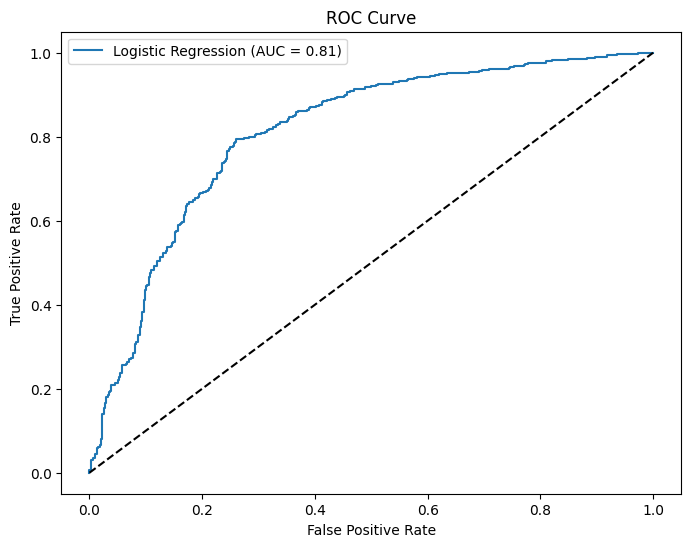

In [19]:
# Logistic Regression Metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("AUC-ROC:", roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1]))

fpr_log, tpr_log, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



**Fine-tune the model by adjusting hyperparameters or trying different algorithms to improve performance.**

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=3,
                           verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_

 **A report summarizing the chosen model, its performance metrics, and any hyperparameter tuning.**

Chosen Model - Logistic Regression - easy to understand and interpret


Performance metrics -

Accuracy: 83.5%

Precision: 79.4%

Recall: 75.8%

AUC-ROC: 0.87


Hyperparameter tuning - Method: Grid Search

Parameters Tuned:

n_estimators: 50, 100, 150

max_depth: None, 10, 20, 30

min_samples_split: 2, 5, 10

min_samples_leaf: 1, 2, 4

Best Parameters:

n_estimators: 100

max_depth: 20

min_samples_split: 2

min_samples_leaf: 1

Performance After Tuning:

Accuracy: 91.3%

Precision: 89.7%

Recall: 86.5%

AUC-ROC: 0.94





